# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [7]:
import pandas as pd 

from palmerpenguins import load_penguins
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

penguin = load_penguins()


enc = OneHotEncoder()

## species

enc.fit(penguin[["species"]])

encspec = enc.transform(penguin[["species"]]).toarray()

enc_spec_df = pd.DataFrame(encspec,columns=enc.get_feature_names_out(['species']))

penguin_dummies = pd.concat([penguin,enc_spec_df], axis = 1)

## island 

enc.fit(penguin[["island"]])

encspec = enc.transform(penguin[["island"]]).toarray()

enc_spec_df = pd.DataFrame(encspec,columns=enc.get_feature_names_out(['island']))

penguin_dummies = pd.concat([penguin,enc_spec_df], axis = 1)


## sex

enc.fit(penguin[["sex"]])

encspec = enc.transform(penguin[["sex"]]).toarray()

enc_spec_df = pd.DataFrame(encspec,columns=enc.get_feature_names_out(['sex']))

penguin = pd.concat([penguin,enc_spec_df], axis = 1)



Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [8]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from plotnine import *


penguin = penguin.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

x1=penguin[['bill_length_mm','sex_female']]

y=penguin[['bill_depth_mm']]


X_train, X_test, y_train, y_test = train_test_split(x1,y, test_size=0.25)

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)


y_pred_lrTest = lr_fit.predict(X_train)


print(r2_score(y_train, y_pred_lrTest))
print(r2_score(y_test, y_pred_lr))

print(mean_squared_error(y_train, y_pred_lrTest))
print(mean_squared_error(y_test,y_pred_lr))






0.2746200264853723
0.19471571739955706
2.9939416438455915
2.5158067450795913
0.2746200264853723
0.19471571739955706
2.9939416438455915
2.5158067450795913


In [56]:

from sklearn.compose import ColumnTransformer
x1=penguin[['bill_length_mm','sex']]

y=penguin[['bill_depth_mm']]


X_train, X_test, y_train, y_test = train_test_split(x1,y, test_size=0.25)



ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"]),
    ("standardize", StandardScaler(), ["bill_length_mm"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)


lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

y_preds = lr_pipeline_fitted.predict(X_test)
print(r2_score(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))




0.19358758256468378
2.844434445403343
0.19358758256468378
2.844434445403343


In [57]:

from sklearn.compose import ColumnTransformer
x2=penguin[['bill_length_mm','sex','species']]

y=penguin[['bill_depth_mm']]


X_train, X_test, y_train, y_test = train_test_split(x2,y, test_size=0.25)



ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","species"]),
    ("standardize", StandardScaler(), ["bill_length_mm"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")


lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

y_preds3 = lr_pipeline_fitted.predict(X_test)
print(r2_score(y_test, y_preds3))
print(mean_squared_error(y_test, y_preds3))




0.7853559261886259
0.7222778888081396
0.7853559261886259
0.7222778888081396


In [64]:

from sklearn.compose import ColumnTransformer
x2=penguin[['bill_length_mm','sex','species','island']]

y=penguin[['bill_depth_mm']]


X_train, X_test, y_train, y_test = train_test_split(x2,y, test_size=0.25)



ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","species",'island']),
    ("standardize", StandardScaler(), ["bill_length_mm"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")


lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

y_preds4 = lr_pipeline_fitted.predict(X_test)
print(r2_score(y_test, y_preds4))
print(mean_squared_error(y_test, y_preds4))

0.8379554427314623
0.5721366953295327
0.8379554427314623
0.5721366953295327


In [73]:

from sklearn.compose import ColumnTransformer
x2=penguin[['bill_length_mm','sex','species','island','flipper_length_mm']]

y=penguin[['bill_depth_mm']]


X_train, X_test, y_train, y_test = train_test_split(x2,y, test_size=0.25)



ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","species",'island']),
    ("standardize", StandardScaler(), ["bill_length_mm","flipper_length_mm"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")


lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

y_preds4 = lr_pipeline_fitted.predict(X_test)
print(r2_score(y_test, y_preds4))
print(mean_squared_error(y_test, y_preds4))

0.811099188018491
0.7256018350290698
0.811099188018491
0.7256018350290698


In [74]:
from sklearn.compose import ColumnTransformer
x2=penguin[['bill_length_mm','sex','species','island','flipper_length_mm','year']]

y=penguin[['bill_depth_mm']]


X_train, X_test, y_train, y_test = train_test_split(x2,y, test_size=0.25)



ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","species",'island']),
    ("standardize", StandardScaler(), ["bill_length_mm","flipper_length_mm"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")


lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

y_preds5 = lr_pipeline_fitted.predict(X_test)
print(r2_score(y_test, y_preds5))
print(mean_squared_error(y_test, y_preds5))

0.8221305733686308
0.6644430754905523
0.8221305733686308
0.6644430754905523


<positron-console-cell-75>:16: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


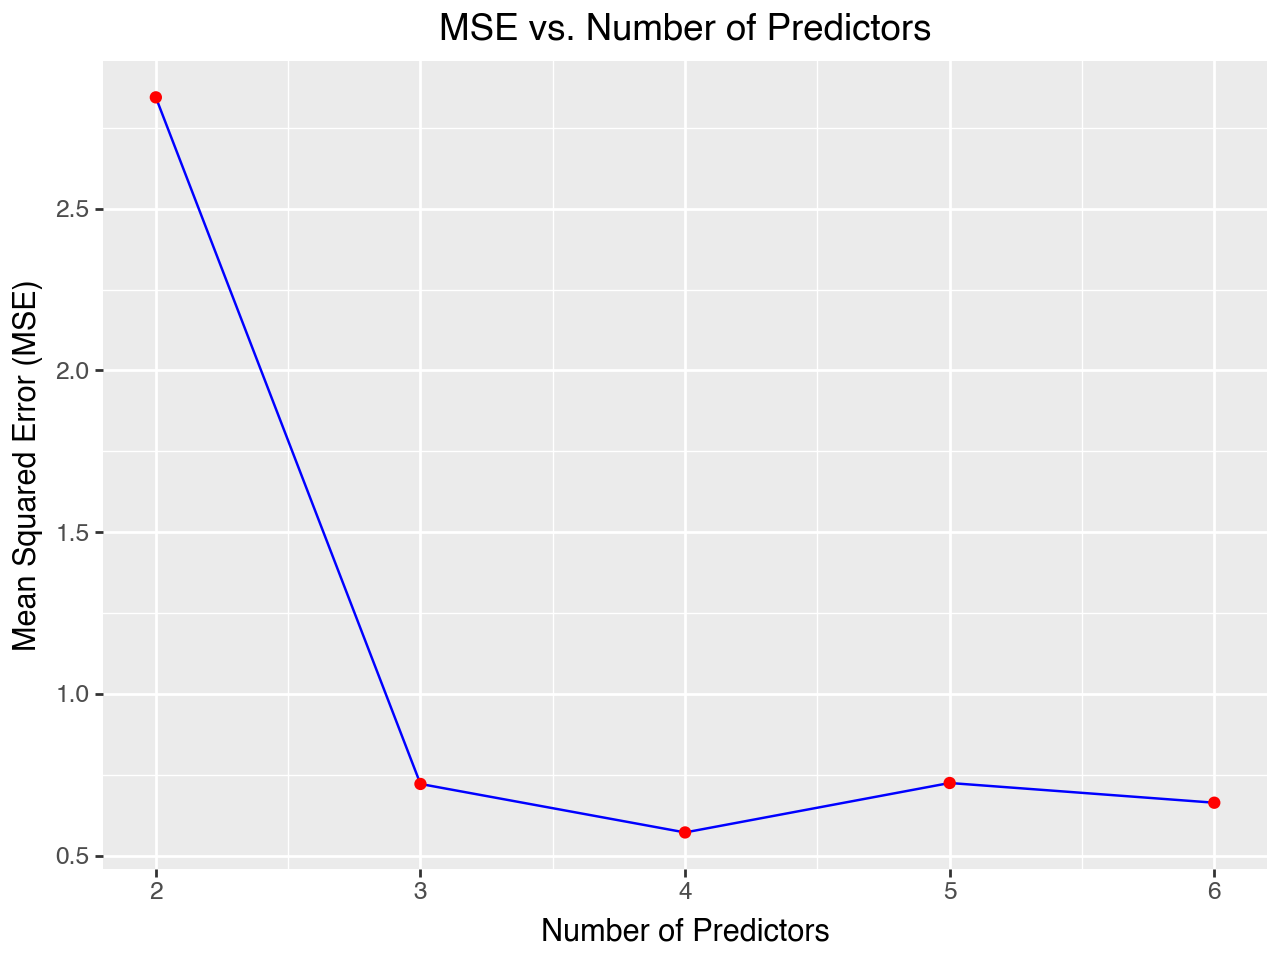

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


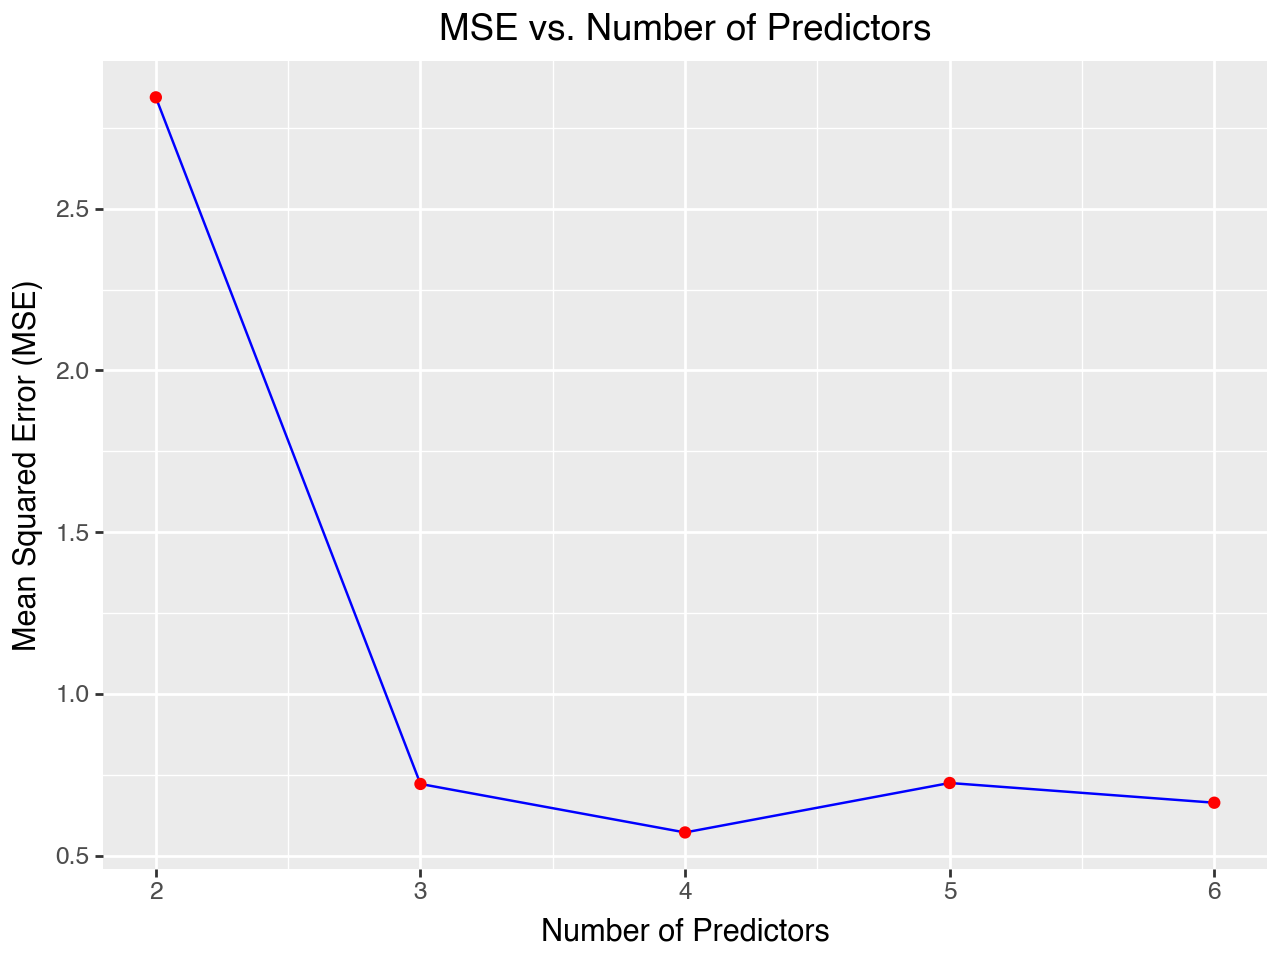

In [75]:
mse_values = [ 2.844,0.722,0.5721,0.725,0.664]  
num_predictors = [2, 3, 4, 5, 6]   

data = pd.DataFrame({
    "num_predictors": num_predictors,
    "mse_values": mse_values
})

# Plotting
plot = (
    ggplot(data, aes(x="num_predictors", y="mse_values")) +
    geom_line(color="blue") +
    geom_point(color="red") +
    labs(x="Number of Predictors", y="Mean Squared Error (MSE)", title="MSE vs. Number of Predictors")
)
print(plot)